In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [2]:
# 加载数据集

data = load_diabetes()
X, y = pd.DataFrame(data.data,
                    columns=data.feature_names), pd.DataFrame(data.target, columns=["target"])

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

# EDA

In [4]:
# 检查数据信息
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None


In [5]:
# 描述统计部分
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


<Axes: >

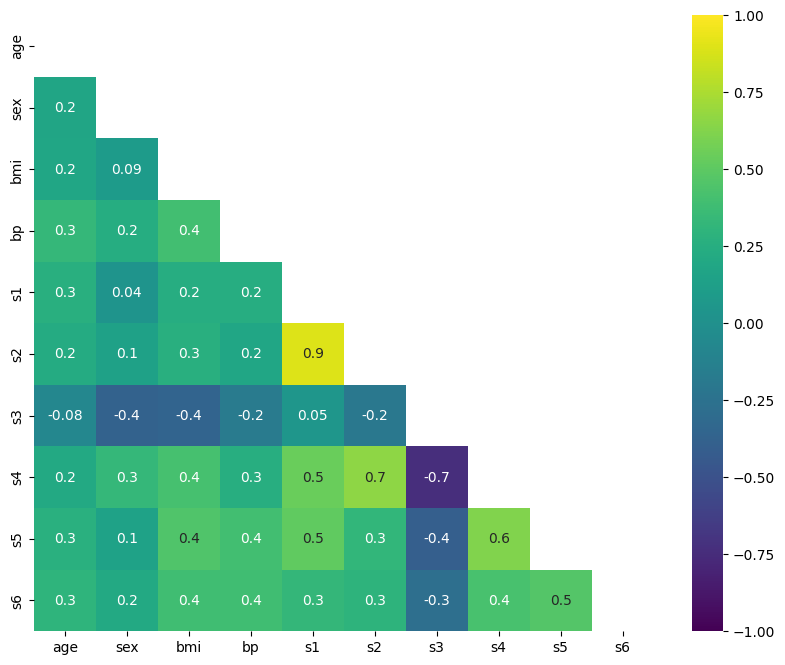

In [6]:
# 查看相关系数
mask = np.triu(np.ones_like(X.corr()))
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap="viridis", annot=True,
            mask=mask, vmin=-1, vmax=1, fmt=".1g")

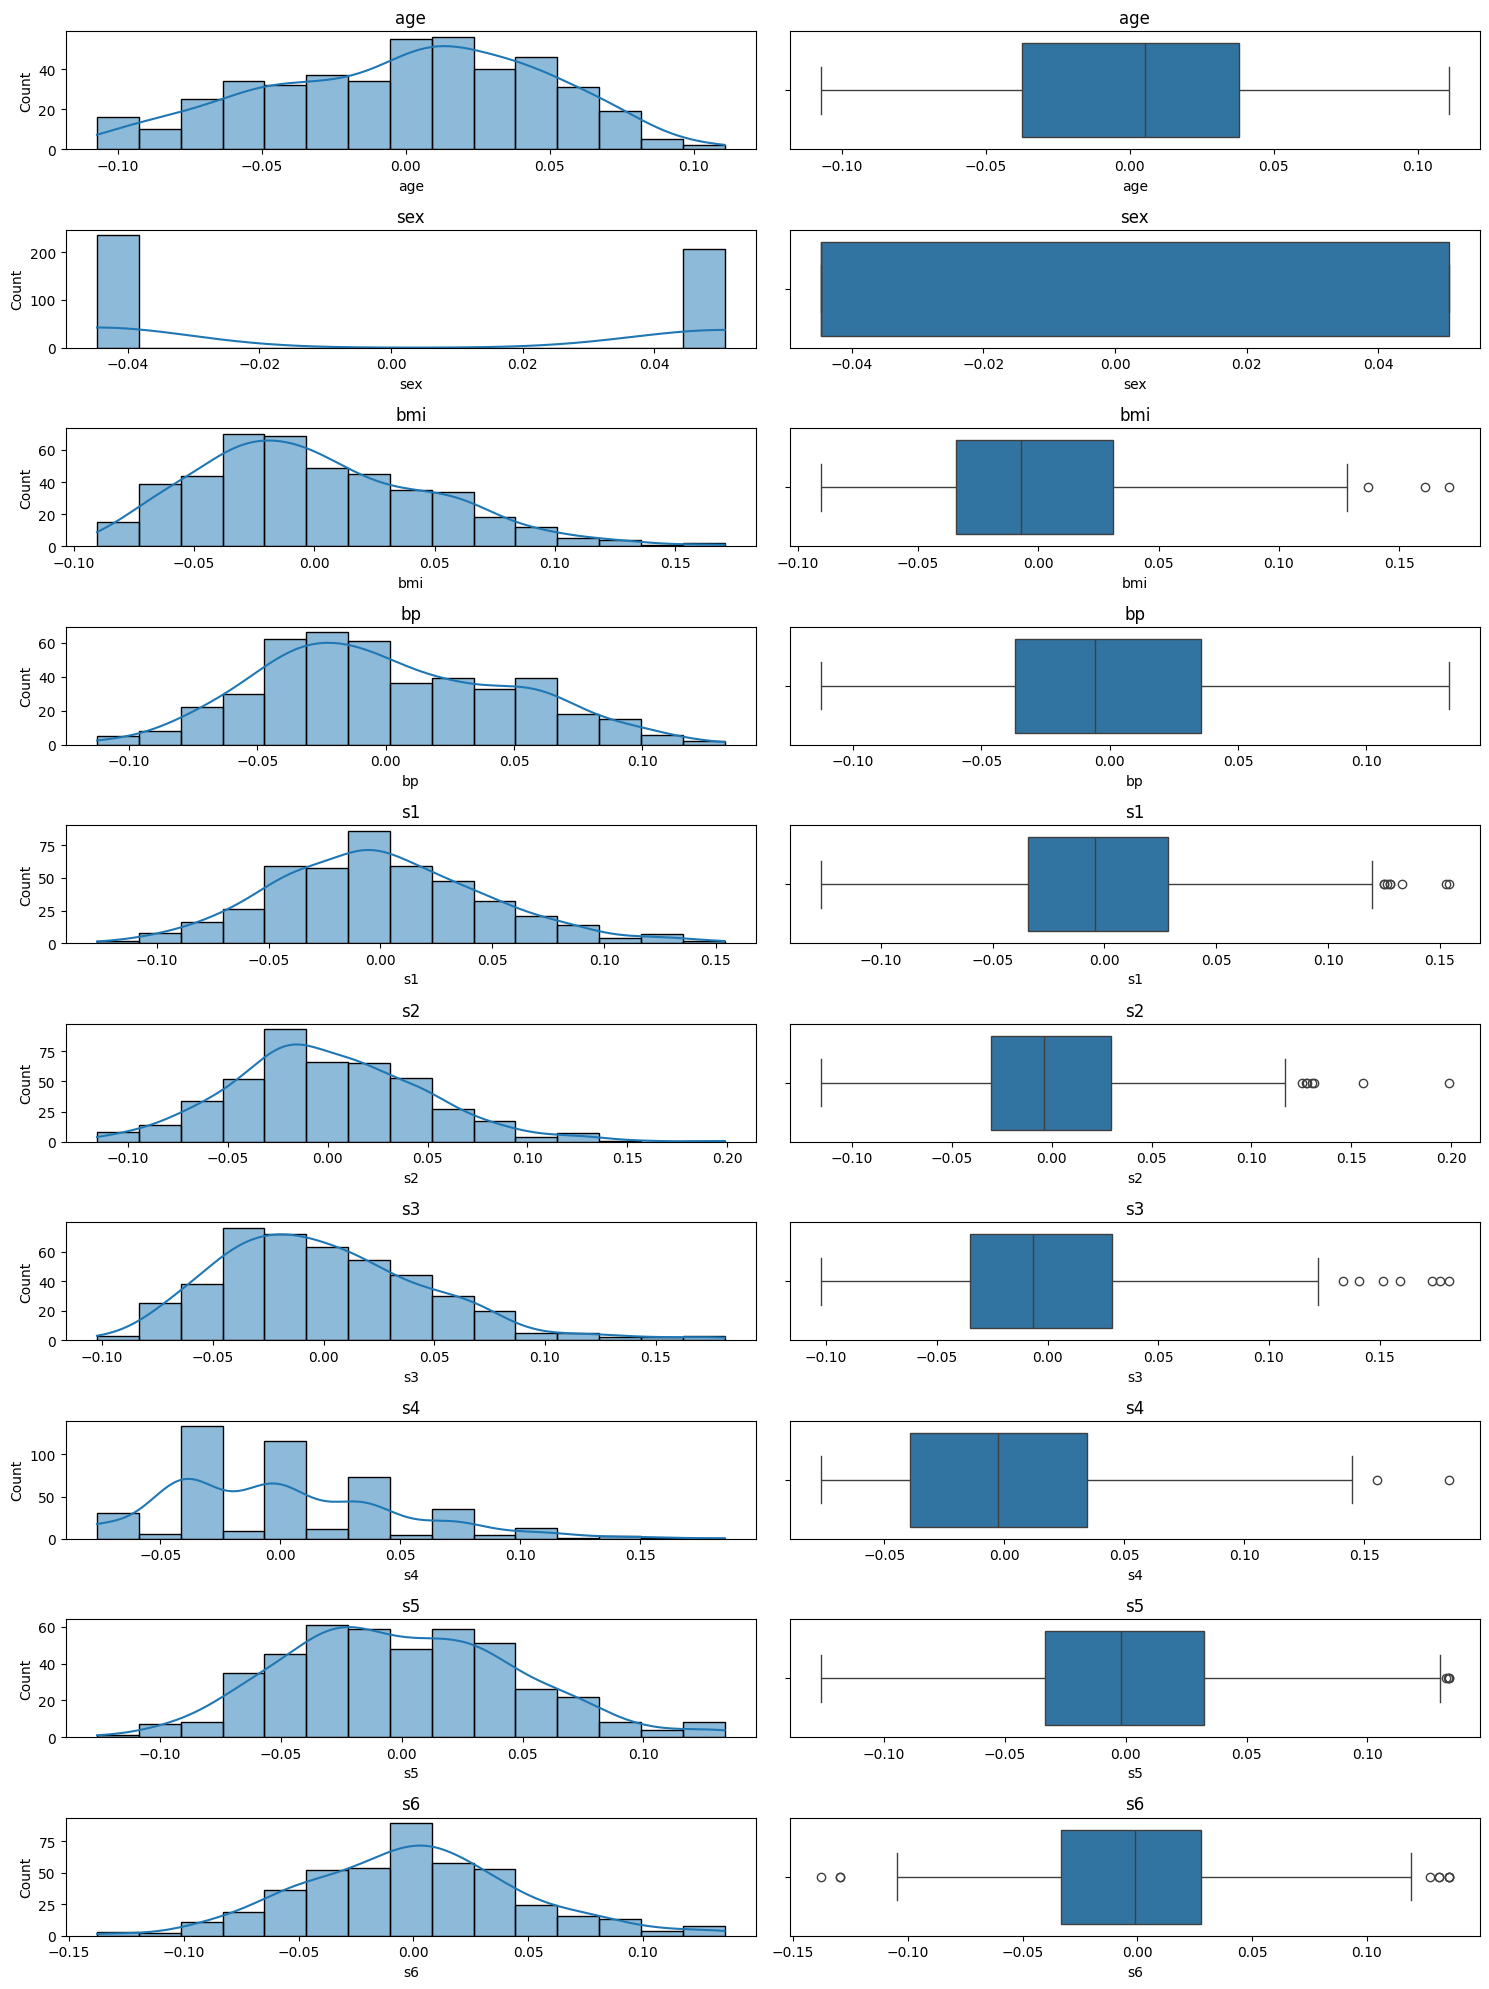

In [7]:
# 查看数据分布
fig, axes = plt.subplots(10, 2, figsize=(15, 20))

for ind, col in enumerate(X.columns):
    plt.subplot(10, 2, 2*ind+1)
    sns.histplot(X[col], bins=15, kde=True)
    plt.gca().set_title(col)

    plt.subplot(10, 2, 2*ind+2)
    sns.boxplot(X[col], orient="h")
    plt.gca().set_title(col)

fig.tight_layout()
plt.show()

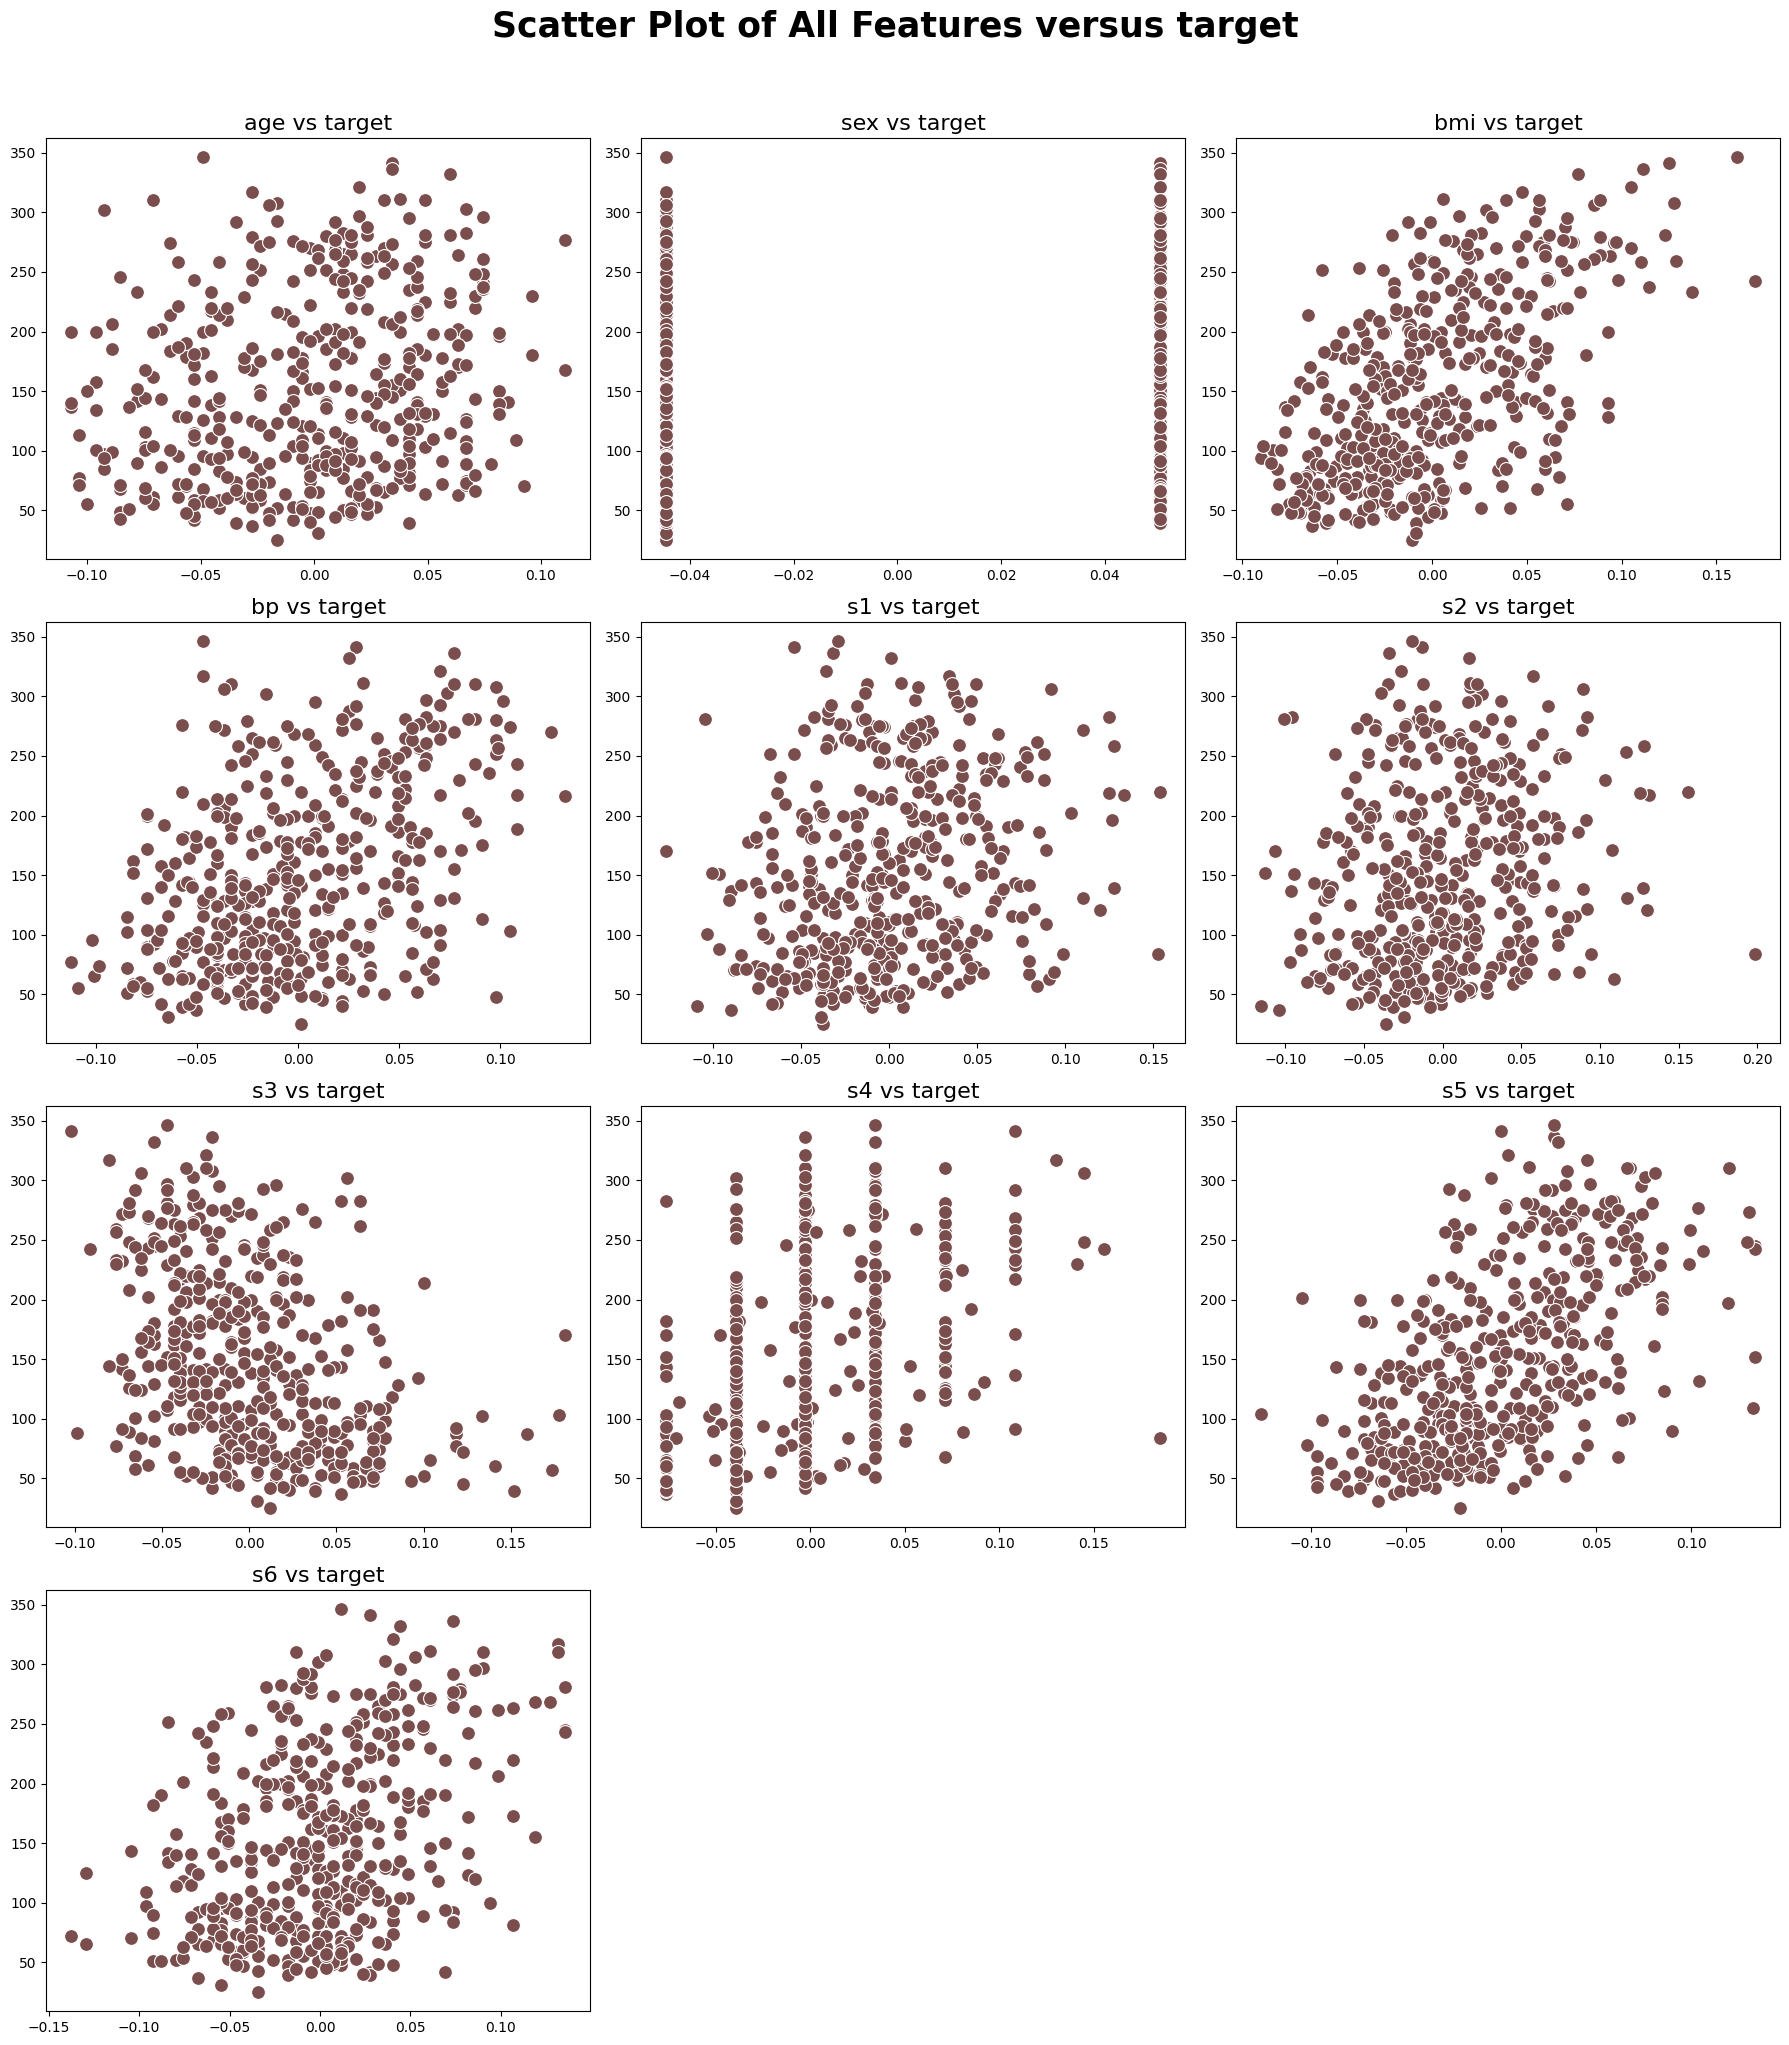

In [8]:
# 各变量与目标变量的散点图

concat_Xy = pd.concat([X, y], axis=1)
num_features = concat_Xy.shape[1] - 1
num_rows = (num_features + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))

axes = axes.flatten()

for i, feature in enumerate(concat_Xy.columns):
    if feature != 'target':
        sns.scatterplot(data=concat_Xy, x=feature, y='target',
                        ax=axes[i], color='#7b4e4e', s=100)
        axes[i].set_title(f'{feature} vs target', fontsize=16)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Scatter Plot of All Features versus target',
             ha='center', fontweight='bold', fontsize=25, y=1.02)
plt.tight_layout()
plt.show()

# 多重共线性

## 多重共线性诊断

### 方差膨胀因子

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels


def calculate_vif(data):
    # 添加常数列
    data_with_const = add_constant(data)

    # 创建一个数据框来存储VIF值
    vif_data = pd.DataFrame()
    vif_data["variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(
        data_with_const.values, i) for i in range(data.shape[1])]

    return vif_data


vif_result = calculate_vif(X)
vif_result

,variable,VIF
0,age,1.000000
1,sex,1.217307
2,bmi,1.278071
3,bp,1.509437
4,s1,1.459428
5,s2,59.202510
6,s3,39.193370
7,s4,15.402156
8,s5,8.890986
9,s6,10.075967


## 解决办法

###  PCA降维+线性回归

In [10]:
from sklearn.decomposition import PCA

# 将维数降至5维
pca = PCA(n_components=5)

X_pca = pca.fit_transform(X)

# 获取每个主成分解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 计算累计方差比例
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 打印每个主成分解释的方差比例和累计方差比例
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"前 {i+1} 个主成分的累计方差比例：{ratio:.4f}")

前 1 个主成分的累计方差比例：0.4024
前 2 个主成分的累计方差比例：0.5517
前 3 个主成分的累计方差比例：0.6722
前 4 个主成分的累计方差比例：0.7678
前 5 个主成分的累计方差比例：0.8340


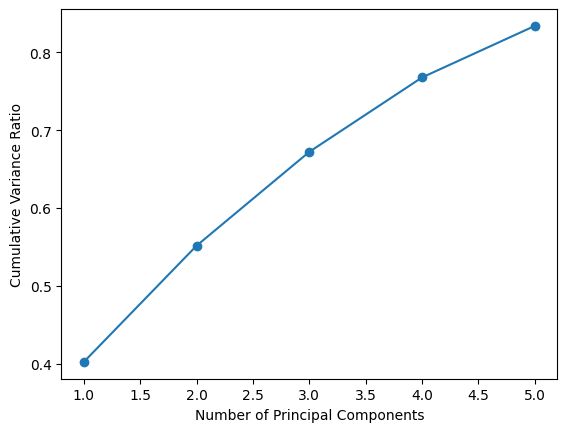

In [11]:
# 绘制碎石图
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(np.arange(1, len(explained_variance_ratio) + 1),
         cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# 拟合模型
linear = LinearRegression()
linear.fit(X_pca, y)
y_pred = linear.predict(X_pca)

# 计算R方值
r_squared = r2_score(y, y_pred)

# 使用交叉验证计算MSE
mse = -cross_val_score(linear, X_pca, y, cv=5,
                       scoring='neg_mean_squared_error').mean()

# 使用交叉验证计算MAE
mae = -cross_val_score(linear, X_pca, y, cv=5,
                       scoring='neg_mean_absolute_error').mean()
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R_Squared:", r_squared)

Mean Squared Error (MSE): 3016.3107006972823
Mean Absolute Error (MAE): 44.66451266972193
R_Squared: 0.5003777531835893


In [13]:
import statsmodels.api as sm
from statsmodels.compat import lzip

# 拟合模型
X_pca = sm.add_constant(X_pca)
model = sm.OLS(y.to_numpy(), X_pca)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     87.33
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.75e-63
Time:                        16:52:44   Log-Likelihood:                -2393.8
No. Observations:                 442   AIC:                             4800.
Df Residuals:                     436   BIC:                             4824.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.607     58.361      0.0

###  岭回归

#### 岭迹图

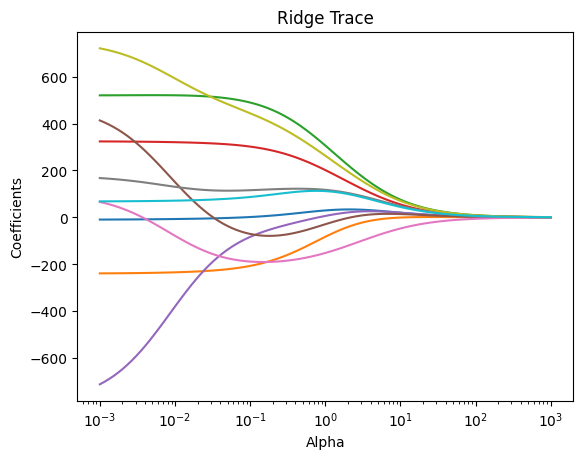

In [14]:
from sklearn.linear_model import Ridge

# 创建一个alpha的范围（超参数）
alphas = np.logspace(-3, 3, num=100)

# 初始化一个空列表来存储岭迹结果
coefs = []

# 遍历不同的alpha值，拟合岭回归模型，并记录系数
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X, y)
    coefs.append(ridge_reg.coef_)

# 绘制岭迹图
for i, row in enumerate(coefs):
    coefs[i] = np.array(row).flatten()

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coefficients')
ax.set_title('Ridge Trace')
plt.show()

#### 网格搜索最优参数

In [15]:
from sklearn.model_selection import GridSearchCV

# 创建一个Ridge回归模型
ridge = Ridge()

# 设置需要尝试的alpha值范围
param_grid = {'alpha': np.logspace(-5, 5, num=100)}

# 使用GridSearchCV进行参数搜索
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X, y)

# 输出最佳的alpha值
print("最佳的alpha值: ", grid_search.best_params_['alpha'])

最佳的alpha值:  0.00041320124001153346


#### 创建岭回归模型

In [16]:
ridge = Ridge(alpha=0.00041320124001153346)

# 拟合模型
ridge.fit(X, y)
y_pred = ridge.predict(X)

# 计算R方值
r_squared = r2_score(y, y_pred)

# 使用交叉验证计算MSE
mse = -cross_val_score(ridge, X, y, cv=5,
                       scoring='neg_mean_squared_error').mean()

# 使用交叉验证计算MAE
mae = -cross_val_score(ridge, X, y, cv=5,
                       scoring='neg_mean_absolute_error').mean()


# 计算调整R方
adjusted_r_squared = 1 - (1 - r_squared) * \
    (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("adjusted_r_squared:", adjusted_r_squared)

Mean Squared Error (MSE): 2992.992508719195
Mean Absolute Error (MAE): 44.27141542821692
adjusted_r_squared: 0.5065510565962852


### LASSO回归

In [17]:
from sklearn.linear_model import Lasso
# 创建一个Lasso回归模型
lasso = Lasso()

# 设置需要尝试的alpha值范围
param_grid = {'alpha': np.logspace(-3, 3, num=100)}

# 使用GridSearchCV进行参数搜索
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X, y)

# 输出最佳的alpha值
print("最佳的alpha值: ", grid_search.best_params_['alpha'])

lasso = Lasso(alpha=grid_search.best_params_['alpha'])

# 拟合模型
lasso.fit(X, y)
y_pred = lasso.predict(X)

# 计算R方值
r_squared = r2_score(y, y_pred)

# 使用交叉验证计算MSE
mse = -cross_val_score(lasso, X, y, cv=5,
                       scoring='neg_mean_squared_error').mean()

# 使用交叉验证计算MAE
mae = -cross_val_score(lasso, X, y, cv=5,
                       scoring='neg_mean_absolute_error').mean()

# 计算调整R方
adjusted_r_squared = 1 - (1 - r_squared) * \
    (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("adjusted_r_squared:", adjusted_r_squared)

最佳的alpha值:  0.003511191734215131
Mean Squared Error (MSE): 2991.8619867078064
Mean Absolute Error (MAE): 44.25512449772661
adjusted_r_squared: 0.5062338506142594


In [18]:
# from sklearn.linear_model import ElasticNet
# # 创建一个ElasticNet模型
# elastic_net = ElasticNet()

# # 设置需要尝试的alpha和l1_ratio值范围
# param_grid = {'alpha': np.logspace(-3, 3, num=100),
#               'l1_ratio': np.linspace(0, 1, 30)}

# # 使用GridSearchCV进行参数搜索
# grid_search = GridSearchCV(elastic_net, param_grid, cv=5)
# grid_search.fit(X, y)

# # 输出最佳的参数组合
# print("最佳的参数组合: ", grid_search.best_params_)

# elastic = ElasticNet(alpha=grid_search.best_params_[
#                      'alpha'], l1_ratio=grid_search.best_params_['l1_ratio'])

# # 拟合模型
# elastic.fit(X, y)
# y_pred = elastic.predict(X)

# # 计算R方值
# r_squared = r2_score(y, y_pred)

# # 计算调整R方
# adjusted_r_squared = 1 - (1 - r_squared) * \
#     (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)

# print("adjusted_r_squared:", adjusted_r_squared)

### 逐步回归

In [19]:
import toad
stepwise_X = toad.selection.stepwise(concat_Xy,
                                     target='target',
                                     estimator="ols",
                                     direction="both",
                                     criterion="aic")

stepwise_X

,bmi,bp,s5,target
0,0.061696,0.021872,0.019907,151.0
1,-0.051474,-0.026328,-0.068332,75.0
2,0.044451,-0.005670,0.002861,141.0
3,-0.011595,-0.036656,0.022688,206.0
4,-0.036385,0.021872,-0.031988,135.0
...,...,...,...,...
437,0.019662,0.059744,0.031193,178.0
438,-0.015906,-0.067642,-0.018114,104.0
439,-0.015906,0.017293,-0.046883,132.0
440,0.039062,0.001215,0.044529,220.0


In [20]:
vif_result = calculate_vif(stepwise_X)
vif_result

,variable,VIF
0,bmi,8.507042
1,bp,1.611431
2,s5,1.324650
3,target,1.559175


In [21]:
# 拟合模型
step_X = stepwise_X[["bmi", "bp", "s5"]]
linear.fit(step_X, y)
y_pred = linear.predict(step_X)

# 计算R方值
r_squared = r2_score(y, y_pred)

# 使用交叉验证计算MSE
mse = -cross_val_score(linear, step_X, y, cv=5,
                       scoring='neg_mean_squared_error').mean()

# 使用交叉验证计算MAE
mae = -cross_val_score(linear, step_X, y, cv=5,
                       scoring='neg_mean_absolute_error').mean()

# 计算调整R方
adjusted_r_squared = 1 - (1 - r_squared) * \
    (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("adjusted_r_squared:", adjusted_r_squared)

Mean Squared Error (MSE): 3110.206815453396
Mean Absolute Error (MAE): 46.14662421671029
adjusted_r_squared: 0.4680193778072701


### 删除变量

In [22]:
cut_X = X.drop(["s1"], axis=1)

vif_result = calculate_vif(cut_X)
vif_result

,variable,VIF
0,age,1.000000
1,sex,1.216892
2,bmi,1.275049
3,bp,1.502320
4,s2,1.457413
5,s3,2.926535
6,s4,3.736890
7,s5,7.818670
8,s6,2.172865


In [23]:
# 拟合模型

linear.fit(cut_X.to_numpy(), y.to_numpy())
y_pred = linear.predict(cut_X.to_numpy())

# 计算R方值
r_squared = r2_score(y, y_pred)

# 使用交叉验证计算MSE
mse = -cross_val_score(linear, cut_X, y, cv=5,
                       scoring='neg_mean_squared_error').mean()

# 使用交叉验证计算MAE
mae = -cross_val_score(linear, cut_X, y, cv=5,
                       scoring='neg_mean_absolute_error').mean()
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R_Squared:", r_squared)

Mean Squared Error (MSE): 3017.6183330093686
Mean Absolute Error (MAE): 44.38713155462664
R_Squared: 0.5137042065137454


# 正态性检验

## 直方图和Q-Q图

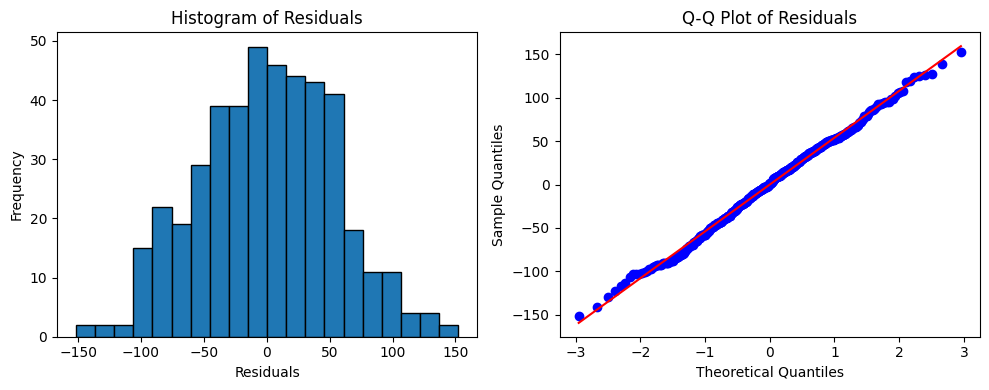

In [24]:
import scipy.stats as stats

# y = y["target"]
residuals = (y_pred - y.to_numpy()).flatten()


def normal_test_plot(residuals):
    # 创建一个2x2的子图布局
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # 绘制第一个子图：直方图
    axs[0].hist(residuals, bins=20, edgecolor='black')
    axs[0].set_title('Histogram of Residuals')
    axs[0].set_xlabel('Residuals')
    axs[0].set_ylabel('Frequency')

    # 绘制第二个子图：Q-Q图
    stats.probplot(residuals, dist="norm", plot=axs[1])
    axs[1].set_title('Q-Q Plot of Residuals')
    axs[1].set_xlabel('Theoretical Quantiles')
    axs[1].set_ylabel('Sample Quantiles')

    # 调整子图之间的间距
    plt.tight_layout()

    # 显示图形
    plt.show()


normal_test_plot(residuals)

## Shapiro-Wilk检验 和D'Agostino and Pearson检验

In [25]:
# Shapiro-Wilk检验
statistic, p_value = stats.shapiro(residuals)
print("Shapiro-Wilk Test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)
if p_value > 0.05:
    print("数据符合正态分布")
else:
    print("数据不符合正态分布")

# D'Agostino and Pearson检验
statistic, p_value = stats.normaltest(residuals)
print("\nD'Agostino and Pearson Test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)
if p_value > 0.05:
    print("数据符合正态分布")
else:
    print("数据不符合正态分布")

Shapiro-Wilk Test:
Test Statistic: 0.9964734315872192
p-value: 0.4430351257324219
数据符合正态分布

D'Agostino and Pearson Test:
Test Statistic: 1.85292532719826
p-value: 0.39595185096231794
数据符合正态分布


# 异方差

## 异方差检测

In [26]:
residuals.shape,

((442,),)

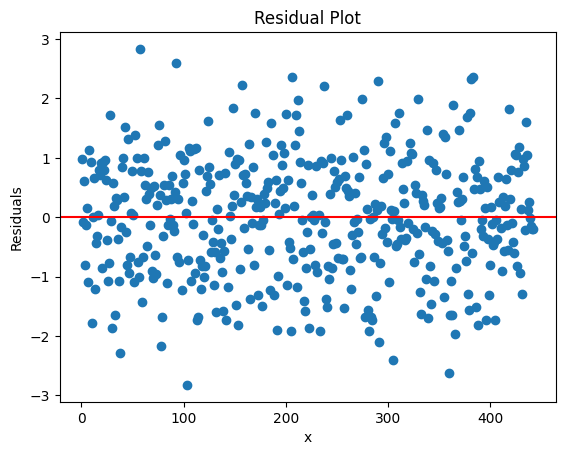

In [27]:
# 残差标准化

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_res = std_scale.fit_transform(residuals[:, np.newaxis])

# 残差散点图
x = np.arange(1, 443)
plt.scatter(x, std_res)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [28]:
import statsmodels.api as sm
from statsmodels.compat import lzip

# 拟合模型
X = sm.add_constant(cut_X.to_numpy())
model = sm.OLS(y.to_numpy(), X)
results = model.fit()

# 进行Goldfeld-Quandt异方差检验
name = ['F statistic', 'p-value']
test = sm.stats.diagnostic.het_goldfeldquandt(
    results.resid, results.model.exog)
print(lzip(name, test))

# 进行Breusch-Pagan异方差检验
name = ['BG statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.diagnostic.het_breuschpagan(results.resid, results.model.exog)
print(lzip(name, test))

# 进行White异方差检验
name = ['Whitle statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.diagnostic.het_white(results.resid, results.model.exog)
print(lzip(name, test))

results.summary()

[('F statistic', 0.9673773561661616), ('p-value', 0.595065791833215)]
[('BG statistic', 25.442223920430976), ('p-value', 0.002519027818329245), ('f-value', 2.93171036122349), ('f p-value', 0.0021886240046397596)]
[('Whitle statistic', 81.36513819766986), ('p-value', 0.007373342160212396), ('f-value', 1.6516823034842965), ('f p-value', 0.004293073169962595)]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     50.71
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           3.06e-62
Time:                        16:52:51   Log-Likelihood:                -2387.8
No. Observations:                 442   AIC:                             4796.
Df Residuals:                     432   BIC:                             4837.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.584     58.883      0.000     147.055     157.212
x1            -7.9150     59.920     -0.132      0.895    -125.685     109.855
x2          -234.1555     61.335     -3.818      0.000    -354.707    -113.604
x3           528.5315     66.577      7.939      0.000     397.676     659.387
x4           319.7634     65.574      4.876      0.000     190.879     448.648
x5          -143.2818     92.922     -1.542      0.124    -325.918      39.354
x6          -250.5971    105.002     -2.387      0.017    -456.976     -44.219
x7            70.4496    151.883      0.464      0.643    -228.072     368.971
x8           461.8393     80.068      5.768      0.000     304.468     619.211
x9            69.1270     66.179      1.045      0.297     -60.946     199.200
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.680
Skew:                           0.044   Prob(JB):                        0.432
Kurtosis:                       2.711   Cond. No.                         75.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

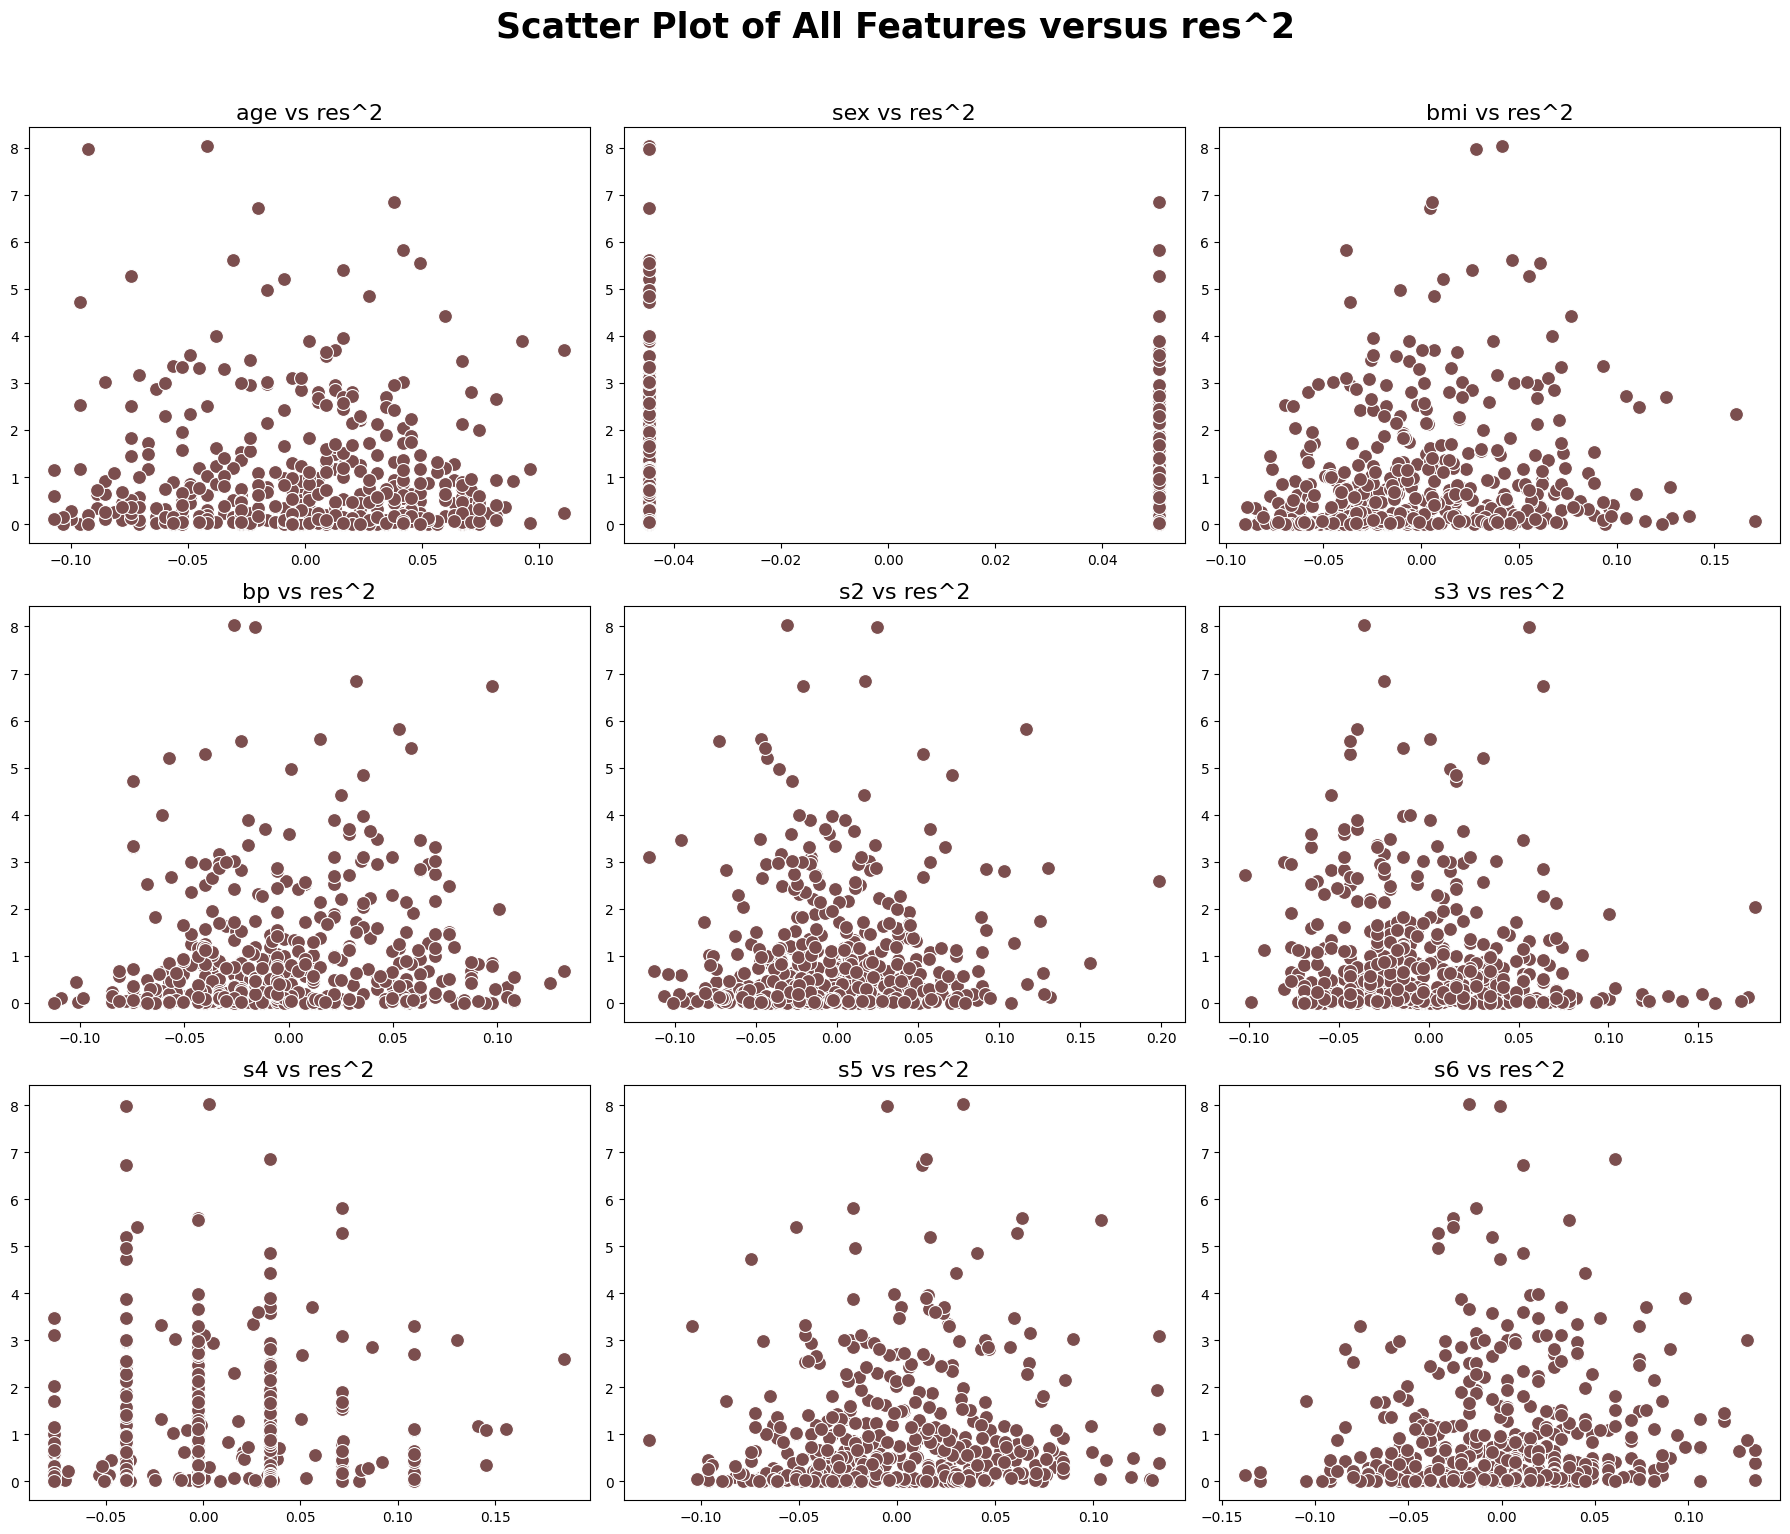

In [29]:
# 绘制每个变量与残差平方的散点图
residuals_2 = (std_res)**2
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

res = pd.DataFrame(residuals_2, columns=["res"])
concat_Xres = pd.concat([cut_X, res], axis=1)

axes = axes.flatten()

for i, feature in enumerate(concat_Xres.columns):
    if feature != 'res':
        sns.scatterplot(data=concat_Xres, x=feature, y='res',
                        ax=axes[i], color='#7b4e4e', s=100)
        axes[i].set_title(f'{feature} vs res^2', fontsize=16)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Scatter Plot of All Features versus res^2',
             ha='center', fontweight='bold', fontsize=25, y=1.02)
plt.tight_layout()
plt.show()

## 异方差处理

### 加权最小二乘回归

In [30]:
w = 1 / (residuals) ** 2

model_w = sm.WLS(y.to_numpy(), X, weights=w)

result_w = model_w.fit()
result_w.summary()

# 进行Goldfeld-Quandt异方差检验
name = ['F statistic', 'p-value']
test = sm.stats.diagnostic.het_goldfeldquandt(
    result_w.resid, result_w.model.exog)
print(lzip(name, test))

# 进行Breusch-Pagan异方差检验
name = ['BG statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.diagnostic.het_breuschpagan(
    result_w.resid, result_w.model.exog)
print(lzip(name, test))

# 进行White异方差检验
name = ['Whitle statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.diagnostic.het_white(result_w.resid, result_w.model.exog)
print(lzip(name, test))

[('F statistic', 0.9673773561661614), ('p-value', 0.5950657918332157)]
[('BG statistic', 25.688099058438247), ('p-value', 0.0022972391523496147), ('f-value', 2.96179079199112), ('f p-value', 0.001986695393660889)]
[('Whitle statistic', 81.92521963416688), ('p-value', 0.0065784769024145855), ('f-value', 1.6656385583772255), ('f p-value', 0.0037474599923822695)]


<Axes: >

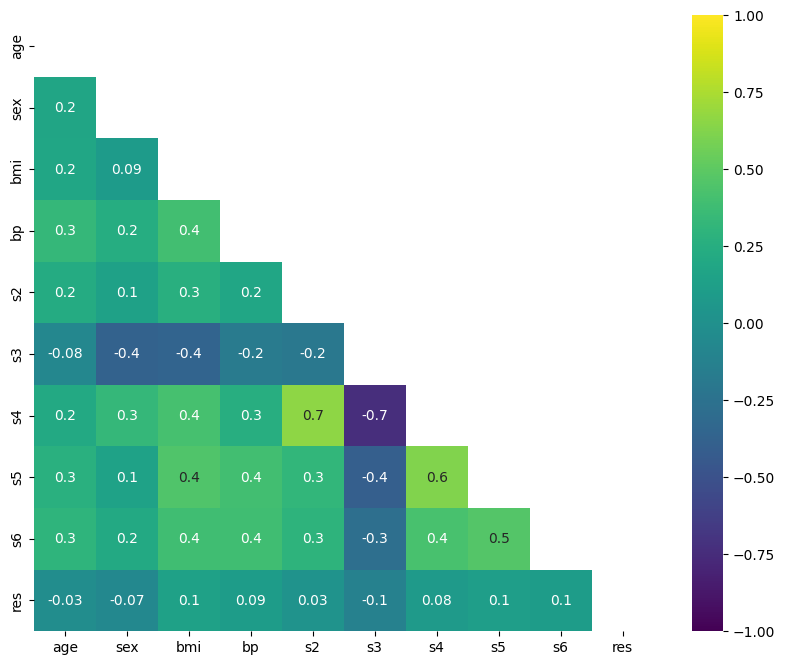

In [31]:
# 查看相关系数
mask = np.triu(np.ones_like(concat_Xres.corr()))
plt.figure(figsize=(10, 8))
sns.heatmap(concat_Xres.corr(), cmap="viridis", annot=True,
            mask=mask, vmin=-1, vmax=1, fmt=".1g")

### Box-Cox变换

In [32]:
from statsmodels.compat import lzip
import statsmodels.api as sm
from scipy import stats


# 进行 Box-Cox 变换
transformed_y, lambda_value = stats.boxcox(y.to_numpy().flatten())

# 输出变换后的数据和最优的 lambda 值
print("最优的 lambda 值：", lambda_value)

# 拟合模型

X = sm.add_constant(cut_X.to_numpy())
model = sm.OLS(transformed_y, X)
results = model.fit()

# 进行Goldfeld-Quandt异方差检验
name = ['F statistic', 'p-value']
test = sm.stats.diagnostic.het_goldfeldquandt(
    results.resid, results.model.exog)
print(lzip(name, test))

# 进行Breusch-Pagan异方差检验
name = ['BG statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.diagnostic.het_breuschpagan(results.resid, results.model.exog)
print(lzip(name, test))

# 进行White异方差检验
name = ['Whitle statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.diagnostic.het_white(results.resid, results.model.exog)
print(lzip(name, test))

最优的 lambda 值： 0.31904480619491143
[('F statistic', 0.9553000868718353), ('p-value', 0.6299511058694041)]
[('BG statistic', 13.95190335281941), ('p-value', 0.12404643441661456), ('f-value', 1.5645236275570338), ('f p-value', 0.12347422692202054)]
[('Whitle statistic', 64.15806322507389), ('p-value', 0.140156039733842), ('f-value', 1.2430738842711282), ('f p-value', 0.12914555243772805)]


### 异方差稳健标准误

In [33]:
# 计算异方差稳健标准误（HC3方法）
model = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC3')

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     70.36
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           4.68e-79
Time:                        16:52:54   Log-Likelihood:                -2387.8
No. Observations:                 442   AIC:                             4796.
Df Residuals:                     432   BIC:                             4837.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.612     58.239      0.000     147.014     157.253
x1            -7.9150     58.297     -0.136      0.892    -122.175     106.345
x2          -234.1555     60.064     -3.898      0.000    -351.878    -116.433
x3           528.5315     69.902      7.561      0.000     391.526     665.537
x4           319.7634     66.314      4.822      0.000     189.791     449.736
x5          -143.2818     92.746     -1.545      0.122    -325.061      38.498
x6          -250.5971     92.490     -2.709      0.007    -431.874     -69.320
x7            70.4496    152.447      0.462      0.644    -228.341     369.240
x8           461.8393     88.396      5.225      0.000     288.585     635.093
x9            69.1270     64.228      1.076      0.282     -56.757     195.011
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.680
Skew:                           0.044   Prob(JB):                        0.432
Kurtosis:                       2.711   Cond. No.                         75.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

# 自相关

2.013662501067557

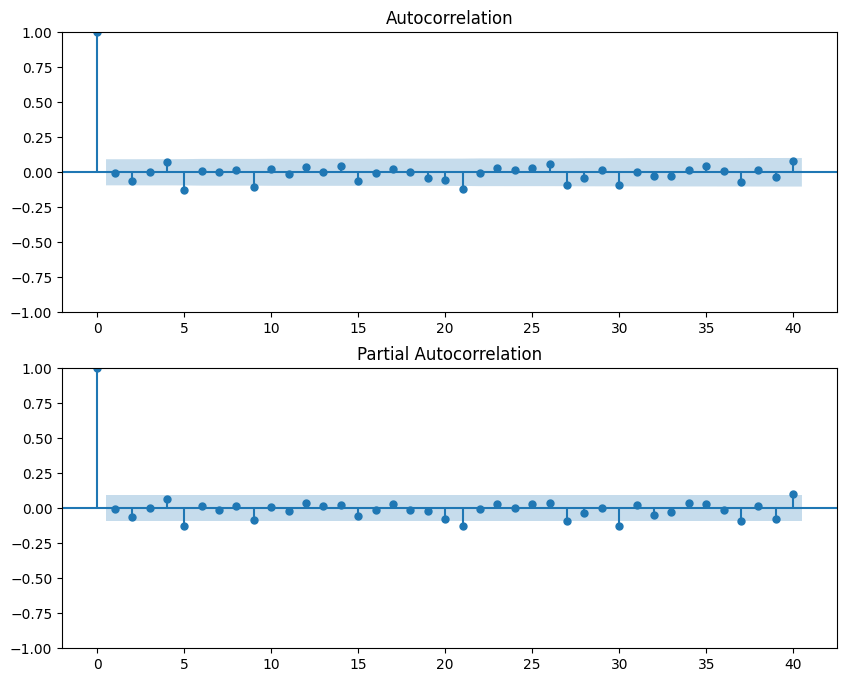

In [34]:
# 绘制残差的自相关函数（ACF）和偏自相关函数（PACF）图
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])

# 进行Durbin-Watson检验
dw_test = sm.stats.stattools.durbin_watson(residuals)

dw_test

# Xgboost

In [115]:
from sklearn.model_selection import train_test_split
# 加载数据集

data = load_diabetes()
X, y = pd.DataFrame(data.data,
                    columns=data.feature_names), pd.DataFrame(data.target, columns=["target"])

# 划分训练集和测试集

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 15, 20, 25],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [200, 500, 1000]
}

xgb = XGBRegressor()

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [10, 15, 20, 25],
                         'n_estimators': [200, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [37]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}

## 计算在训练集和测试集上的MSE

In [125]:
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor(
    max_depth=20,
    min_child_weight=40,
    learning_rate=0.01,
    n_estimators=200,
    objective='reg:squarederror')
    
xgb.fit(X_train, y_train)

xgb_train_mse = mean_squared_error(y_train, xgb.predict(X_train))
xgb_test_mse = mean_squared_error(y_test, xgb.predict(X_test))

print(xgb_train_mse, xgb_test_mse)

2727.4125642321233 2778.3674948086764


In [126]:
# 主成分分析结果
pca = PCA(n_components=5)

X_pca = pca.fit_transform(X)

pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42)

linear = LinearRegression()
linear.fit(pca_X_train, pca_y_train)

pca_train_mse = mean_squared_error(pca_y_train, linear.predict(pca_X_train))
pca_test_mse = mean_squared_error(pca_y_test, linear.predict(pca_X_test))

print(pca_train_mse, pca_test_mse)

3056.9041284945506 2773.001082085396


In [127]:
# 岭回归分析结果

ridge = Ridge(alpha=0.00041320124001153346)
ridge.fit(X_train, y_train)

ridge_train_mse = mean_squared_error(y_train, ridge.predict(X_train))
ridge_test_mse = mean_squared_error(y_test, ridge.predict(X_test))

print(ridge_train_mse, ridge_test_mse)

2924.1462589753605 2821.1727984478134


In [129]:
# LASSO分析结果

lasso = Lasso(0.003511191734215131)
lasso.fit(X_train, y_train)

lasso_train_mse = mean_squared_error(y_train, lasso.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, lasso.predict(X_test))

print(lasso_train_mse, lasso_test_mse)

2926.2725558972766 2818.160807840845


In [144]:
# 删除变量后结果

# X = X.drop(["s1"], axis=1)
transformed_y, lambda_value = stats.boxcox(y.to_numpy().flatten())

# 划分训练集和测试集

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

linear.fit(X_train, y_train)

transformed_Xy_train_mse = mean_squared_error(y_train, linear.predict(X_train))
transformed_Xy_test_mse = mean_squared_error(y_test, linear.predict(X_test))

print(transformed_Xy_train_mse, transformed_Xy_test_mse)

2958.8100891619724 2827.408026065757


In [143]:
result ={
    "PCA":[pca_train_mse, pca_test_mse],
    "Ridge":[ridge_train_mse, ridge_test_mse],
    "LASSO":[lasso_train_mse, lasso_test_mse],
    "cut_X":[transformed_Xy_train_mse, transformed_Xy_test_mse],
    "Xgboost":[xgb_train_mse, xgb_test_mse]
}

result =pd.DataFrame(result,index=["Train_MSE","Test_MSE"])
result

,PCA,Ridge,LASSO,cut_X,Xgboost
Train_MSE,3056.904128,2924.146259,2926.272556,2958.810089,2727.412564
Test_MSE,2773.001082,2821.172798,2818.160808,2827.408026,2778.367495


In [152]:
xgb = XGBRegressor(
    max_depth=20,
    min_child_weight=40,
    learning_rate=0.01,
    n_estimators=200,
    objective='reg:squarederror')

xgb.fit(X_train, y_train)

xgb_train_mse = mean_squared_error(y_train, xgb.predict(X_train))
xgb_test_mse = mean_squared_error(y_test, xgb.predict(X_test))

print(xgb_train_mse, xgb_test_mse)

2738.6205920977727 2776.527439314888
